<h1>Análisando algoritmos de ordenamiento</h1>

In [3]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [4]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [5]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[2 1 8 6 3 4 9 0 7 5]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [6]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [7]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [8]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [10]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [11]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [12]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [13]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 113


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [14]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [15]:
print exper_analysis(10)

[2, 2, 8, 14, 32, 53, 56, 80, 95, 92]


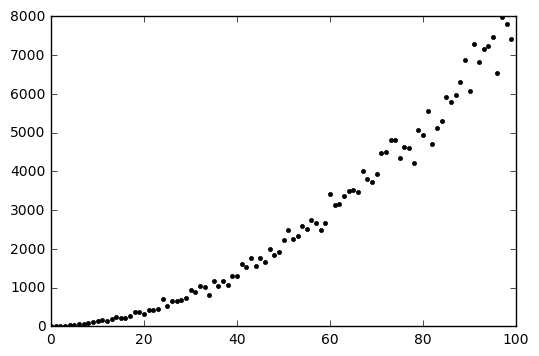

In [16]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

<h1>Actividad</h1>
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

In [102]:
import time
import random as rnd

def time_analysis(n):
    results = []
    for i in range(n):
        l = range(n)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        insertion_sort(l)
        toc = time.clock()#get final time
        results.append(format((toc - tic) * 1e6, '.5'))
    return results

In [103]:
print time_analysis(10)

['36.0', '30.0', '29.0', '33.0', '31.0', '36.0', '34.0', '34.0', '26.0', '38.0']


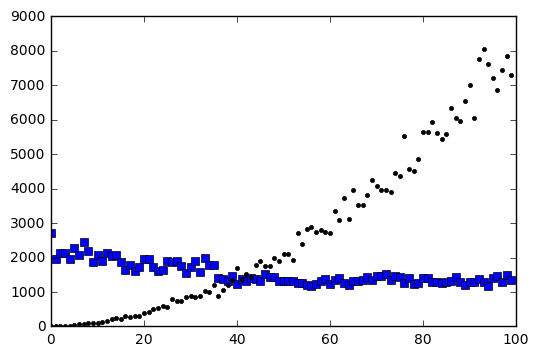

In [104]:
pl.clf()
x = np.arange(100)
y1 = np.array(time_analysis(100))
y2 = np.array(exper_analysis(100))
pl.plot(x, y1, 'bs', x, y2, '.k')
pl.show()

<h1>Merge Sort Analysis</h1>

<h2>Merge Sort Algorithm</h2>

In [20]:
def merge(a, aux, lo, mid, hi):
    for k in range(lo, hi + 1):
        aux[k] = a[k]
    i = lo
    j = mid + 1
    for k in range(lo, hi + 1):
        if (i > mid): 
            a[k] = aux[j]
            j+=1
        elif (j > hi):
            a[k] = aux[i]
            i+=1
        elif (aux[j] < aux[i]):
            a[k] = aux[j]
            j+=1
        else:
            a[k] = aux[i]
            i+=1
def sort(a, aux, lo, hi):
    if (hi <= lo):
        return
    mid = lo + (hi - lo) / 2
    sort(a, aux, lo, mid)
    sort(a, aux, mid+1, hi)
    merge(a, aux, lo, mid, hi)
def mergeSort(a):
    aux = [None] * len(a)
    sort(a, aux, 0, len(a) - 1)

In [21]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[2 3 0 1 7 5 6 9 8 4]
[0 1 2 3 4 5 6 7 8 9]


<h3>Correctitud</h3>

<b>Invariante:</b> Al comienzo de cada merge el arreglo $A[lo..mid]$ esta ordenado y $A[mid+1..hi]$ también esta ordenado.

In [22]:
def mergeInvariant(A, B):
    l1 = list(A)
    l2 = list(B)
    l1.sort()
    l2.sort()
    return (A == l1) and (B == l2)

In [23]:
print mergeInvariant([1, 2, 3, 4], [4, 3, 2, 1])
print mergeInvariant([1, 2, 3, 4], [6, 7, 8, 9])

False
True


In [24]:
def mergeWithInvariant(a, aux, lo, mid, hi):
    try:
        assert mergeInvariant(a[lo:mid], a[mid+1:hi])
    except AssertionError:
        print "Error en el invariante en Merge!"
        print "Arreglo de lo a mid es: ", a[lo:mid]
        print "Arreglo de mid + 1 a hi es: ", a[mid+1:hi]
        
    for k in range(lo, hi + 1):
        aux[k] = a[k]
    i = lo
    j = mid + 1
    for k in range(lo, hi + 1):
        if (i > mid): 
            a[k] = aux[j]
            j+=1
        elif (j > hi):
            a[k] = aux[i]
            i+=1
        elif (aux[j] < aux[i]):
            a[k] = aux[j]
            j+=1
        else:
            a[k] = aux[i]
            i+=1

def rightMergeSortHelp(a, aux, lo, hi):
    if (hi <= lo):
        return
    mid = lo + (hi - lo) / 2
    sort(a, aux, lo, mid)
    sort(a, aux, mid+1, hi)
    mergeWithInvariant(a, aux, lo, mid, hi)
def rightMergeSort(a):
    aux = [None] * len(a)
    rightMergeSortHelp(a, aux, 0, len(a) - 1)

In [25]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
rightMergeSort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [26]:
def wrongMergeSortHelp(a, aux, lo, hi):
    if (hi <= lo):
        return
    mid = lo + (hi - lo) / 2
    sort(a, aux, lo, mid)
    mergeWithInvariant(a, aux, lo, mid, hi)
    #sort(a, aux, mid+1, hi)
    
        
def wrongMergeSort(a):
    aux = [None] * len(a)
    wrongMergeSortHelp(a, aux, 0, len(a) - 1)

In [27]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrongMergeSort(B)
print B

Error en el invariante en Merge!
Arreglo de lo a mid es:  [3, 4, 5, 6]
Arreglo de mid + 1 a hi es:  [2, 8, 1]
[2, 3, 4, 5, 6, 7, 8, 1, 9]


<h3> Análisis del Tiempo de Ejecución</h3>

In [28]:
def acct_merge(a, aux, lo, mid, hi, acct):
    for k in range(lo, hi + 1):
        aux[k] = a[k]
    i = lo
    j = mid + 1
    for k in range(lo, hi + 1):
        if (i > mid): 
            acct.count()
            a[k] = aux[j]
            j+=1
        elif (j > hi):
            acct.count()
            a[k] = aux[i]
            i+=1
        elif (aux[j] < aux[i]):
            acct.count()
            a[k] = aux[j]
            j+=1
        else:
            a[k] = aux[i]
            i+=1
def acct_sort(a, aux, lo, hi, acct):
    ##acct.count()
    if (hi <= lo):
        return
    mid = lo + (hi - lo) / 2
    acct_sort(a, aux, lo, mid, acct)
    acct_sort(a, aux, mid+1, hi, acct)
    acct_merge(a, aux, lo, mid, hi, acct)
def acct_mergeSort(a, acct):
    aux = [None] * len(a)
    acct_sort(a, aux, 0, len(a) - 1,  acct)

In [105]:
B = np.random.permutation(range(0,100))
acct = Counter()
acct_mergeSort(B, acct)
acct.print_steps()

Number of steps = 382


<h3>Análisis Experimental</h3>
<p>Número de comparaciones para ordenar el arreglo</p>

In [30]:
import random as rnd

def merge_exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_mergeSort(l, acct)
        results.append(acct.steps)
    return results

In [31]:
print merge_exper_analysis(10)

[0, 0, 1, 4, 4, 8, 11, 11, 15, 20]


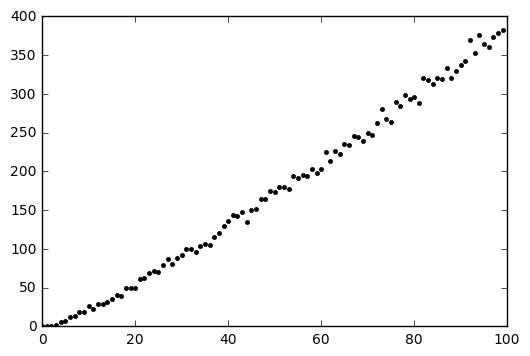

In [32]:
pl.clf()
x = np.arange(100)
y = np.array(merge_exper_analysis(100))
pl.plot(x, y, 'k.')

<h3>Análisis de Tiempo</h3>
<p>Tiempo que toma para ordenar el arreglo</p>

In [116]:
import time
import random as rnd

def merege_time_analysis(n):
    results = []
    for i in range(n):
        l = range(n)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        mergeSort(l)
        toc = time.clock()#get final time
        results.append(format((toc - tic) * 1e5, '.5'))
    return results

In [117]:
print merege_time_analysis(10)

['8.5', '7.4', '7.2', '7.4', '7.3', '7.5', '7.5', '7.4', '8.6', '8.0']


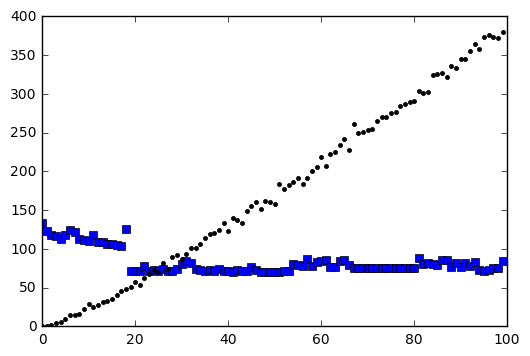

In [119]:
pl.clf()
x = np.arange(100)
y1 = np.array(merege_time_analysis(100))
y2 = np.array(merge_exper_analysis(100))
pl.plot(x, y1, 'bs', x, y2, '.k')
pl.show()

<h1>Quick Sort Analysis</h1>

In [122]:
def quickSort(alist):
   quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
   if first<last:

       splitpoint = partition(alist,first,last)

       quickSortHelper(alist,first,splitpoint-1)
       quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
   pivotvalue = alist[first]

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark

In [124]:
B = np.random.permutation(range(0,10))
print B
quickSort(B)
print B

[1 8 2 0 5 3 4 7 6 9]
[0 1 2 3 4 5 6 7 8 9]
